assignment:4
Author@ Narayanareddy
id:nt732862

from the below cell we import the os module to acess the file from the any operating system and print the directories in the folder 

In [3]:
import os
print(os.listdir('C:/Users/ntadi/Pictures'))

['ab', 'assign', 'assignment', 'bhumra', 'bindu', 'Camera Roll', 'chahal', 'chiru', 'desktop.ini', 'dhawan', 'dhoni', 'gayle', 'indu', 'koti', 'narayana', 'Pictures.rar', 'prabhas', 'ragini', 'rana', 'ravi', 'redd', 'rohit', 'sachin', 'samar', 'Saved Pictures', 'siva', 'surya', 'test', 'velu', 'venkey', 'vk']


here we import the numpy ,pandas,matplot libraries to resd and manuplate the images 

In [4]:
# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

configure
 sets matplotlib to inline and displays graphs below the corressponding cell.

In [5]:

%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)


here we import the libraries to train and split the data into test and train data 

In [6]:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder


import the modules to preprocess the images preprocess. and tensorflow to object detection 

In [7]:

from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.python.keras import backend as k
from tensorflow.keras import backend
#from keras import backend as K
from tensorflow_core.python.keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn


Using TensorFlow backend.


here import the libraries cv2 to load the images and zipfile module to in case we are used to read the zip files 

In [10]:
import cv2                  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

create the two lists x and Y and load the images and lables into the lists

In [15]:
X=[]
Z=[]
IMG_SIZE=200
ab_DIR='C:/Users/ntadi/Pictures/ab'
bhumra_DIR='C:/Users/ntadi/Pictures/bhumra'
nanrayana_DIR='C:/Users/ntadi/Pictures/nanrayana'

function to read the images and labeles 

In [16]:
def assign_label(img,person):
    return person

function to load the images and resize the images

In [17]:
def make_train_data(person,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,person)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

here we load the images from the local memory 

In [18]:
make_train_data('ab',ab_DIR)
make_train_data('bhumra',bhumra_DIR)
make_train_data('nanrayana',nanrayana_DIR)

100%|████████████████████████████████████████████████████████████████████████████████| 53/53 [00:00<00:00, 1165.58it/s]


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/ntadi/Pictures/nanrayana'

for loop to print the images randomly 

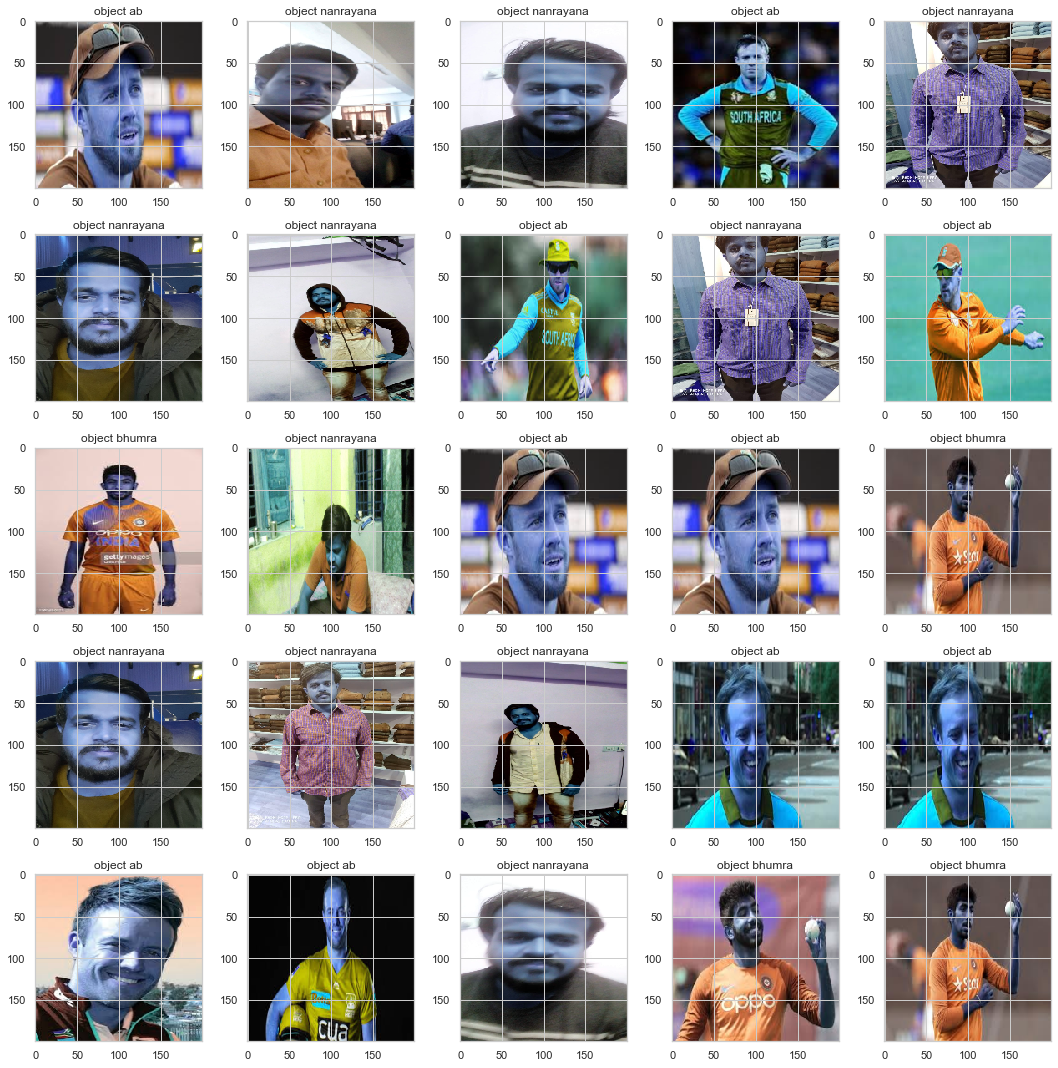

In [12]:
fig,ax=plt.subplots(5,5)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (5):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('object '+Z[l])
        
plt.tight_layout()

here we use labelEncoder to encode the label data 

In [13]:
le=LabelEncoder()
Y=list(Z)
Y=le.fit_transform(Z)
Y=to_categorical(Y,3)
X=np.array(X)
X=X/255

here we split the data set into testing and training data 

In [14]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [15]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)


here we built an CNN model to train our data with input size of 200x200 and relu and softmax activation functions

In [16]:


model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (200,200,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(3, activation = "softmax"))

assign the batch size to 32 

In [17]:
batch_size=32
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

image data generatior to train the data 

In [18]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

compile the model

In [19]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

fit the model into cnn

In [25]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                             epochs = 50, validation_data = (x_test,y_test), verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
#model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_test,y_test))

Epoch 1/50
1/1 [==============================] - 1s 841ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 3.1224 - val_accuracy: 0.7500
Epoch 2/50
1/1 [==============================] - 1s 1s/step - loss: 0.1753 - accuracy: 0.9375 - val_loss: 3.8416 - val_accuracy: 0.7500
Epoch 3/50
1/1 [==============================] - 1s 1s/step - loss: 0.0533 - accuracy: 0.9688 - val_loss: 4.3544 - val_accuracy: 0.7500
Epoch 4/50
1/1 [==============================] - 1s 755ms/step - loss: 0.1743 - accuracy: 0.9333 - val_loss: 4.4603 - val_accuracy: 0.7500
Epoch 5/50
1/1 [==============================] - 1s 1s/step - loss: 0.2487 - accuracy: 0.9375 - val_loss: 2.5690 - val_accuracy: 0.7500
Epoch 6/50
1/1 [==============================] - 1s 743ms/step - loss: 0.0170 - accuracy: 1.0000 - val_loss: 1.1757 - val_accuracy: 0.8750
Epoch 7/50
1/1 [==============================] - 1s 1s/step - loss: 0.0416 - accuracy: 0.9688 - val_loss: 0.5663 - val_accuracy: 0.9375
Epoch 8/50
1/1 [================

save the model 

In [76]:
import pickle

In [77]:
saved_model = pickle.dumps(History)

In [78]:
knn_from_pickle = pickle.loads(saved_model)

In [85]:
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

draw the graph for loss vs epoches 

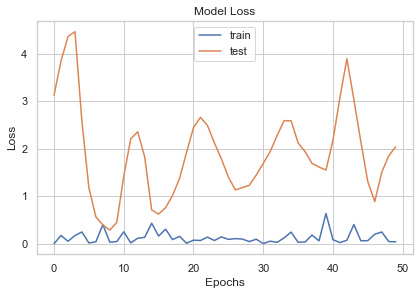

In [27]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

draw the graph for accuracy

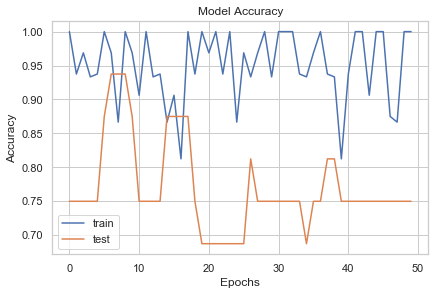

In [28]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()

# predict

here we are predicting that our model correctly identified the image or not

In [67]:
def make_train_data(person,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,person)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        s.append(np.array(img))
        a.append(str(label))

In [71]:
pred=model.predict(s)
pred_digits=np.argmax(pred,axis=1)

for loop to calulate the number of images are correctly recognized and wrongly predicted images 

In [73]:
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==12):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==12):
        break

IndexError: index 1 is out of bounds for axis 0 with size 1

here we print the images that are correctly identified by the model

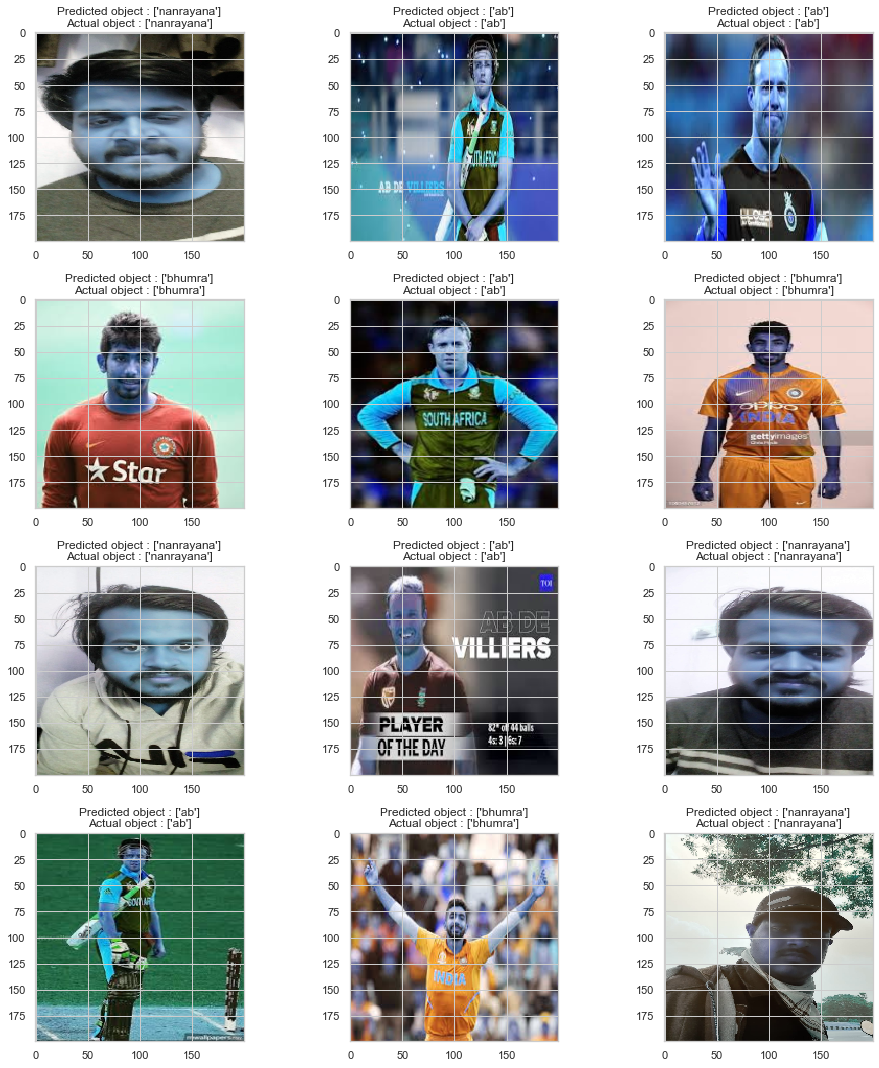

In [43]:
count=0
fig,ax=plt.subplots(4,3)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (3):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted object : "+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual object : "+str(le.inverse_transform([np.argmax([y_test[prop_class[count]]])])))
        plt.tight_layout()
        count+=1

here print some images that are wrongly predicted  

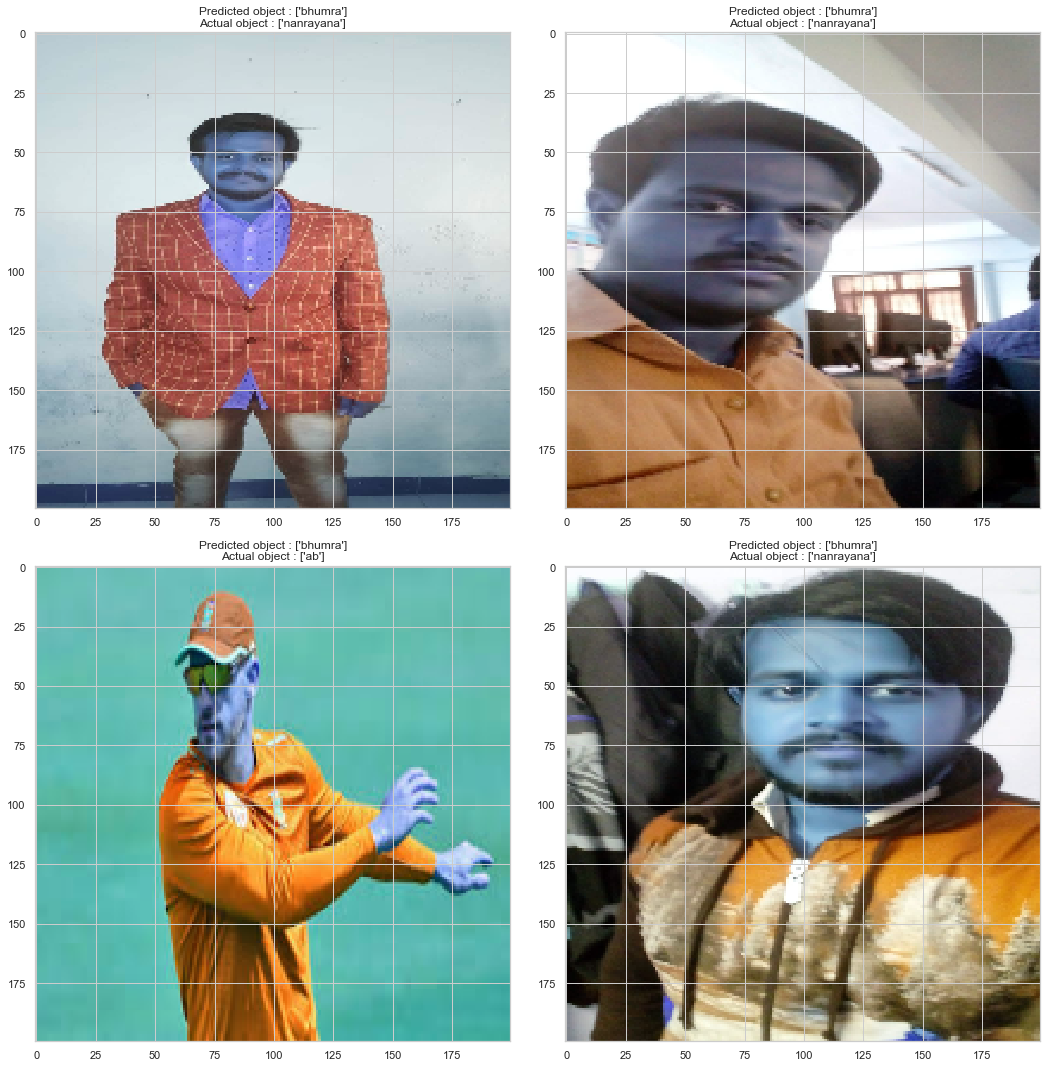

In [44]:
count=0
fig,ax=plt.subplots(2,2)
fig.set_size_inches(15,15)
for i in range (2):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted object : "+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual object : "+str(le.inverse_transform([np.argmax([y_test[mis_class[count]]])])))
        plt.tight_layout()
        count+=1

here  we use less less number of images but we get more than 90 percent accuracy  

# Bibliography

https://www.kaggle.com/rajmehra03/flower-recognition-cnn-keras